1: mean 0.849 mm, median 0.848 mm, [box-range]/2 0.133 mm, std 0.041 mm
2: mean 1.789 mm, median 1.787 mm, [box-range]/2 0.029 mm, std 0.012 mm
3: mean 6.248 mm, median 6.248 mm, [box-range]/2 0.019 mm, std 0.008 mm
4: mean 7.400 mm, median 7.399 mm, [box-range]/2 0.023 mm, std 0.011 mm


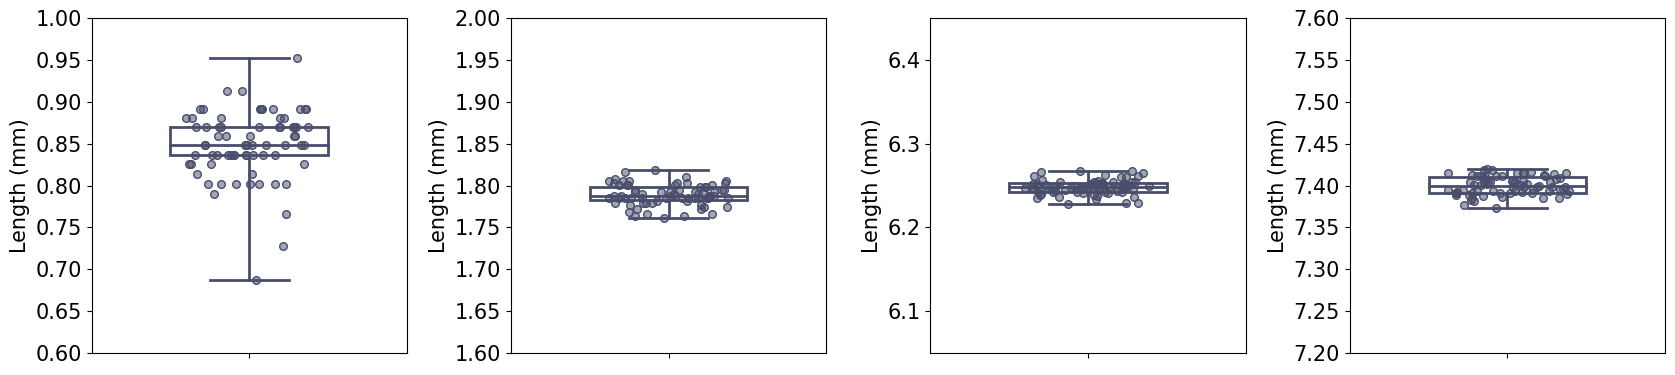

In [3]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

save_option = True
figsavepath = "../Figures/FigureS7_imaging-error.svg"

data_dir = "../Data/FigureS07_Imaging-error"

csv_list = glob.glob(f"{data_dir}/*.csv")
csv_list.sort()

df_list = []
area_list = []

for csv in csv_list:
    df = pd.read_csv(csv)
    df_list.append(df)
    area = df['Area'].to_list()
    area_list.append(area)

true_area = [0.72, 108.16, 3.2, 39.04, 54.76]

### Figure Plot ###
plt.rcParams["font.size"] = 15
fig, axes = plt.subplots(nrows=1, ncols=4, tight_layout=True, figsize=(17,4))

Y_b1 = [np.sqrt(n) for n in area_list[0]] # 0.72 mm2 = 0.85
Y_b2 = [np.sqrt(n) for n in area_list[2]] # 3.20 mm2 = 1.79
Y_b3 = [np.sqrt(n) for n in area_list[3]] # 39.04 mm2 = 6.25
Y_b4 = [np.sqrt(n) for n in area_list[4]] # 54.76 mm2 = 7.4

Y_b1 = [n*np.sqrt(true_area[0])/np.mean(Y_b1) for n in Y_b1]
Y_b2 = [n*np.sqrt(true_area[2])/np.mean(Y_b2) for n in Y_b2]
Y_b3 = [n*np.sqrt(true_area[3])/np.mean(Y_b3) for n in Y_b3]
Y_b4 = [n*np.sqrt(true_area[4])/np.mean(Y_b4) for n in Y_b4]

def bplot(i, Y, label,yrange):
    real_L = float(label[0:4])
    # Box plots
    bp=axes[i].boxplot([Y],
                  labels=[''],
                  patch_artist=True,  # enable detail change
                  widths=0.5,  # box width
                  zorder=1,
                  whis=[0,100], #below 10% and upper 90% is fliers
                  showfliers=False
                  )

    colors=['#474D6B', '#474D6B'] # boxes, medians, fliers
    colors2=['#474D6B', '#474D6B', '#474D6B', '#474D6B'] # whiskers, caps

    # box color
    for b, c in zip(bp['boxes'], colors):
        b.set(color=c, linewidth=2)  # box frame
        b.set_facecolor('White') # box
    # center line
    for b, c in zip(bp['medians'], colors):
        b.set(color=c, linewidth=2)
    # whisker
    for b, c in zip(bp['whiskers'], colors2):
        b.set(color=c, linewidth=2)
    # cap
    for b, c in zip(bp['caps'], colors2):
        b.set(color=c, linewidth=2)
    # outsider
    for b, c in zip(bp['fliers'], colors):
        b.set(markeredgecolor=c, markeredgewidth=2)

    mean, width = 1, 0.2
    X_b1 = np.random.uniform(mean-width, mean+width, len(Y))
    X_b1 -= np.mean(X_b1)
    X_b1 += mean # mean value

    axes[i].set_xlabel('')
    axes[i].set_ylabel('Length (mm)')
    axes[i].set_xlim(0.5,1.5)
    axes[i].set_ylim(yrange)
    axes[i].scatter(X_b1,Y,zorder=2,s=30, c="#474D6B80", linewidths=1, ec="#474D6B",label=label)
    
    # print(np.mean(Y), max(Y)-np.mean(Y), np.mean(Y)-min(Y), np.std(Y))
    print(f'{i+1}: mean {np.mean(Y):.3f} mm, median {np.median(Y):.3f} mm, [box-range]/2 {(max(Y)-min(Y))/2:.3f} mm, std {np.std(Y):.3f} mm')

bplot(0, Y_b1, '0.85 mm', [0.6,1])
bplot(1, Y_b2, '1.79 mm', [1.6,2])
bplot(2, Y_b3, '6.25 mm', [6.05,6.45])
bplot(3, Y_b4, '7.40 mm', [7.2,7.6])

if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight')